# Diabetes 데이터와 Linear Regression
당뇨병 진행도와 관련된 데이터를 이용해 당뇨병 진행을 예측하는 Linear Regression 학습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load
데이터는 sklearn.datasets의 load_diabetes 함수를 이용해 받기

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

당뇨병 데이터의 변수명들은 feature_names라는 키값으로 확인 가능

In [3]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

변수 내용  
- age: 나이
- sex: 성별
- bmi: Body mass index
- bp: Average blood pressure
- 혈청에 대한 6가지 정보들
  - S1, S2, S3, S4, S5, S6

데이터 정답 확인

In [4]:
data, target = diabetes['data'], diabetes['target']

In [7]:
data[0]     # 10개 변수에 대한 값

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [8]:
target[0]

151.0

## 1.2 Data EDA

In [9]:
df = pd.DataFrame(data, columns=diabetes["feature_names"])

In [10]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


## 1.3 Data Split

`sklearn.model_selection`의 `train_test_split` 함수를 이용해 데이터 나누기  
```py
train_test_split(
  *arrays,
  test_size=None,
  train_size=None,
  random_state=None,
  shuffle=True,
  stratify=None
)
```
- *arrays: array로 이루어진 데이터를 입력으로 받음
- test_size: test로 분할될 사이즈를 정함
- train_size: train으로 분할될 사이즈를 정함
- random_state: 다음에도 같은 값을 얻기 위해 난수를 고정
- shuffle: 데이터를 섞을지 말지 결정
- stratify: 데이터를 나눌 때 정답의 분포를 반영

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)  # train과 test를 7:3으로 분할

In [13]:
len(data), len(train_data), len(test_data)

(442, 309, 133)

In [15]:
print("train ratio: {:.2f}".format(len(train_data)/len(data)))
print("test ratio: {:.2f}".format(len(test_data)/len(data)))

train ratio: 0.70
test ratio: 0.30


## Multivariate Regression

### 2.1 학습

In [16]:
from sklearn.linear_model import LinearRegression

multi_regressor = LinearRegression()
multi_regressor.fit(train_data, train_target)

LinearRegression()

### 2.2 회귀식 확인

In [18]:
multi_regressor.intercept_

153.51548672282306

In [19]:
multi_regressor.coef_

array([ -27.18686943, -167.52188586,  498.9371855 ,  384.60433106,
       -882.14951887,  517.02932583,  163.97297338,  162.60369666,
        775.38288824,  116.89056661])

### 2.3 예측

In [20]:
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

### 2.4 평가
평가는 sklearn.metrics의 mean_squared_error를 이용  
mean_squared_error는 두 값 차이의 제곱의 평균을 계산

In [21]:
from sklearn.metrics import mean_squared_error

multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_test_mse = mean_squared_error(multi_test_pred, test_target)

In [22]:
print(f"Multi Regression Train MSE is {multi_train_mse:.4f}")
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")

Multi Regression Train MSE is 2798.3364
Multi Regression Test MSE is 3104.1393


## 3. Ridge Regression

### 3.1 학습

In [23]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor.fit(train_data, train_target)

Ridge()

### 3.2 회귀식 확인

In [24]:
ridge_regressor.intercept_

153.84490381044856

In [25]:
ridge_regressor.coef_

array([  41.49474634,  -39.59070217,  254.7950416 ,  195.42715891,
         10.2151802 ,  -24.72899404, -132.86684188,   98.33824639,
        234.56311586,  123.5983585 ])

### 3.3 예측

In [26]:
ridge_train_pred = ridge_regressor.predict(train_data)
ridge_test_pred = ridge_regressor.predict(test_data)

### 3.4 평가

In [27]:
ridge_train_mse = mean_squared_error(ridge_train_pred, train_target)
ridge_test_mse = mean_squared_error(ridge_test_pred, test_target)

In [28]:
print(f"Ridge Regression Train MSE is {ridge_train_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")

Ridge Regression Train MSE is 3354.2768
Ridge Regression Test MSE is 3565.3914


## LASSO Regression
### 4.1 학습

In [29]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor.fit(train_data, train_target)

Lasso()

### 4.2 회귀식 확인

In [30]:
lasso_regressor.intercept_

154.11771189012768

In [31]:
lasso_regressor.coef_

array([  0.        ,   0.        , 318.25094641,  60.82249398,
         0.        ,   0.        ,  -0.        ,   0.        ,
       334.4959682 ,   0.        ])

In [32]:
np.array(diabetes["feature_names"])[lasso_regressor.coef_ != 0]

array(['bmi', 'bp', 's5'], dtype='<U3')

### 4.3 예측

In [33]:
lasso_train_pred = lasso_regressor.predict(train_data)
lasso_test_pred = lasso_regressor.predict(test_data)

### 4.4 평가

In [34]:
lasso_train_mse = mean_squared_error(lasso_train_pred, train_target)
lasso_test_mse = mean_squared_error(lasso_test_pred, test_target)

In [35]:
print(f"Lasso Regression Train MSE is {lasso_train_mse:.4f}")
print(f"Lasso Regression Test MSE is {lasso_test_mse:.4f}")

Lasso Regression Train MSE is 3729.7615
Lasso Regression Test MSE is 3829.1869


## 마무리

### 5.1 평가

In [36]:
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")
print(f"Lasso Regression Test MSE is {lasso_test_mse:.4f}")

Multi Regression Test MSE is 3104.1393
Ridge Regression Test MSE is 3565.3914
Lasso Regression Test MSE is 3829.1869


### 5.2 예측값과 실제값의 관계 plot

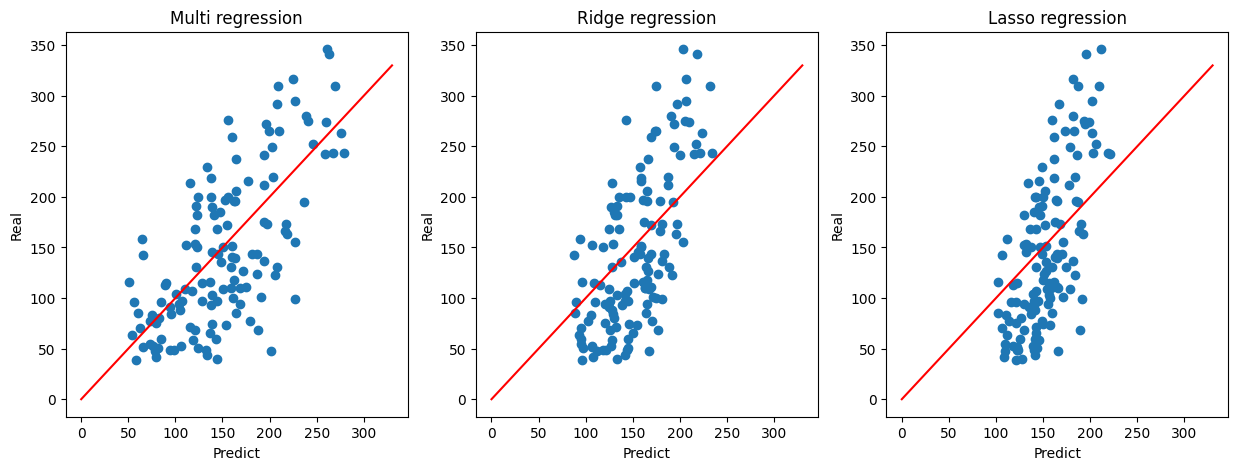

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ('Multi regression', multi_test_pred),
    ('Ridge regression', ridge_test_pred),
    ('Lasso regression', lasso_test_pred),
]

for idx, (name, test_pred) in enumerate(preds):
  ax = axes[idx]
  ax.scatter(test_pred, test_target)
  ax.plot(np.linspace(0, 330, 100), np.linspace(0, 330, 100), color='red')
  ax.set_xlabel("Predict")
  ax.set_ylabel("Real")
  ax.set_title(name)